# **Pendahuluan**


---

Phising Detected adalah proyek model machine learning untuk mengidentifikasi website phising. Phising merupakan suatu kejahatan yang cukup sering terjadi dimanapun. Salah satu penyebabnya adalah kurangnya pengetahuan dan kesadaran masyarakat dalam membedakan antara website resmi dan website phising. Oleh karena itu diperlukan suatu media yang dapat mengidentifikasi website phising untuk masyarakat. Salah satu media yang dapat digunakan adalah sebuah website phising detected yang dapat diakses melalui desktop maupun smartphone dan menurut kami ini adalah kesempatan yang baik untuk mengedukasi masyarakat melalui website ini karena mudah untuk diakses oleh siapapun

# **Data Understanding**
---
Data yang digunakan pada model ini adalah data web phishing dari kaggle.

kaggle datasets download -d taruntiwarihp/phishing-site-urlskaggle datasets

Url sumber data : [Dataset kaggle : Phishing Site Urls](https://www.kaggle.com/taruntiwarihp/phishing-site-urls)

### Import Library
---
Pada bagian ini kami mengimport semua library yang dibutuhkan pada pembuatan model prediksi.

In [3]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
import networkx as next
import pickle
import warnings
warnings.filterwarnings('ignore')

### Mempersiapkan Dataset
---
Pada bagian ini saya mendownload dataset langsung dari kaggle kemudian menampilkannya, dataset yang saya gunakan yaitu phishing_site_urls.csv

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_Phishing.csv')
df

,URL,Label
0,facebook.com,good
1,https://google.com,good
2,twitter.com,good
3,tokopedia.com,good
4,https://instagram.com,good
...,...,...
549,vice.com,good
550,mola.tv,good
551,indihome.co.id,good
552,paypal.com,good


# **Exploratory Data Analysis**
---
tahap eksplorasi dilakukan untuk mendapatkan insight dari dataset

### Deskripsi Variabel
---
Pada dataset ini terdapat 2 variabel yaitu URL merepresentasikan alamat link dan Label merepresentasikan apakah link dikategorikan bad/good.

**Penjelasan** : `df.describe()` dan `df.info()` digunakan untuk mendapatkan informasi dataframe.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     554 non-null    object
 1   Label   554 non-null    object
dtypes: object(2)
memory usage: 8.8+ KB


In [7]:
df.describe()

,URL,Label
count,554,554
unique,554,2
top,facebook.com,good
freq,1,463


### Visualisasi Data
---


untuk masalah klasifikasi kita melakukan pengecekan terlebih dahulu, apakah kelasnya seimbang atau tidak.

In [8]:
label_counts = pd.DataFrame(df.Label.value_counts())

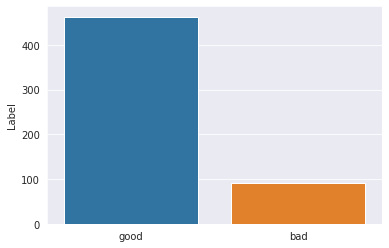

In [9]:
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

# **Data Preparation**
---

### Menangani Missing Value
---

In [10]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

setelah melakukan pengecekan missing value, tidak ada data yang hilang pada dataset yang digunakan.

### Tokenizer
---

membuat vektor URL menggunaka CountVectorizer dan mengumpulkan kata-kata dengan tokenizer.

In [11]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [12]:
df.URL[0]

'facebook.com'

In [13]:
tokenizer.tokenize(df.URL[0])

['facebook', 'com']

In [14]:
print('Mengumpulkan kata...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Waktu yang dibutuhkan',t1 ,'detik')

Mengumpulkan kata...
Waktu yang dibutuhkan 0.003767065000005232 detik


In [15]:
df.sample(10)

,URL,Label,text_tokenized
394,http://paypal-update-account-information-login...,bad,"[http, paypal, update, account, information, l..."
145,hotstar.com,good,"[hotstar, com]"
65,sohu.com,good,"[sohu, com]"
364,paypal.com.it.webapps.mpp.home.holpbenk24.com,bad,"[paypal, com, it, webapps, mpp, home, holpbenk..."
232,coco4game.com,good,"[coco, game, com]"
511,mo88i.com,good,"[mo, i, com]"
193,primevideo.com,good,"[primevideo, com]"
469,gallerynotebook.com,good,"[gallerynotebook, com]"
215,idp-sea.6estates.com,good,"[idp, sea, estates, com]"
92,google.co.jp,good,"[google, co, jp]"


In [16]:
stemmer = SnowballStemmer("english")

In [17]:
print('Mengumpulkan kata...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Waktu yang dibutuhkan',t1 ,'detik')

Mengumpulkan kata...
Waktu yang dibutuhkan 0.03646012299999768 detik


In [18]:
df.sample(10)

,URL,Label,text_tokenized,text_stemmed
500,cekhki.id,good,"[cekhki, id]","[cekhki, id]"
197,thatskygame.com,good,"[thatskygame, com]","[thatskygam, com]"
519,uber.com,good,"[uber, com]","[uber, com]"
65,sohu.com,good,"[sohu, com]","[sohu, com]"
545,soundcloud.com,good,"[soundcloud, com]","[soundcloud, com]"
248,shop.vivo.com/id/,good,"[shop, vivo, com, id]","[shop, vivo, com, id]"
86,tianya.cn,good,"[tianya, cn]","[tianya, cn]"
496,gridmotor.motorplus-online.com,good,"[gridmotor, motorplus, online, com]","[gridmotor, motorplus, onlin, com]"
522,gghype.com,good,"[gghype, com]","[gghype, com]"
277,playruneterra.com/en-us/,good,"[playruneterra, com, en, us]","[playruneterra, com, en, us]"


In [19]:
print('Mengumpulkan kata...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Waktu yang dibutuhkan',t1 ,'detik')

Mengumpulkan kata...
Waktu yang dibutuhkan 0.002016167999997265 detik


In [20]:
df.sample(10)

,URL,Label,text_tokenized,text_stemmed,text_sent
144,t.me,good,"[t, me]","[t, me]",t me
495,gridoto.com,good,"[gridoto, com]","[gridoto, com]",gridoto com
431,instagramreset.com,bad,"[instagramreset, com]","[instagramreset, com]",instagramreset com
323,progate.com,good,"[progate, com]","[progat, com]",progat com
286,icloud.com,good,"[icloud, com]","[icloud, com]",icloud com
370,login-to-paypal.amin-telecom.pk,bad,"[login, to, paypal, amin, telecom, pk]","[login, to, paypal, amin, telecom, pk]",login to paypal amin telecom pk
197,thatskygame.com,good,"[thatskygame, com]","[thatskygam, com]",thatskygam com
439,steamcomnmunuty.com,bad,"[steamcomnmunuty, com]","[steamcomnmunuti, com]",steamcomnmunuti com
112,ampproject.com,good,"[ampproject, com]","[ampproject, com]",ampproject com
400,paypalservice.payment-reviewed.com,bad,"[paypalservice, payment, reviewed, com]","[paypalservic, payment, review, com]",paypalservic payment review com


In [21]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [22]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
5,helps-instagram.com,bad,"[helps, instagram, com]","[help, instagram, com]",help instagram com
352,scr-paypal.co.uk,bad,"[scr, paypal, co, uk]","[scr, paypal, co, uk]",scr paypal co uk
353,paypal.com.myaccount.validation.jossy.psess565...,bad,"[paypal, com, myaccount, validation, jossy, ps...","[paypal, com, myaccount, valid, jossi, psess, ...",paypal com myaccount valid jossi psess blesuit...
354,virfy-paypaly.com,bad,"[virfy, paypaly, com]","[virfi, paypali, com]",virfi paypali com
355,paypal.approved.account.scr.cmd.check.services...,bad,"[paypal, approved, account, scr, cmd, check, s...","[paypal, approv, account, scr, cmd, check, ser...",paypal approv account scr cmd check servic mem...


In [23]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,facebook.com,good,"[facebook, com]","[facebook, com]",facebook com
1,https://google.com,good,"[https, google, com]","[https, googl, com]",https googl com
2,twitter.com,good,"[twitter, com]","[twitter, com]",twitter com
3,tokopedia.com,good,"[tokopedia, com]","[tokopedia, com]",tokopedia com
4,https://instagram.com,good,"[https, instagram, com]","[https, instagram, com]",https instagram com


In [24]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [25]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [26]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

# **Modelling**
---
Pada tahap ini saya mengembangkan model dengan menggunakan algoritma `logistic regression` dan `Multinomial Naive Bayes`.

In [27]:
cv = CountVectorizer()

In [28]:
feature = cv.fit_transform(df.text_sent)

In [29]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label)

<H3> Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

LogisticRegression()

In [32]:
lr.score(testX,testY)

0.935251798561151

In [33]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

In [34]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

Training Accuracy : 0.9542168674698795
Testing Accuracy : 0.935251798561151


In [35]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.67      0.94      0.78        17
        Good       0.99      0.93      0.96       122

    accuracy                           0.94       139
   macro avg       0.83      0.94      0.87       139
weighted avg       0.95      0.94      0.94       139




CONFUSION MATRIX


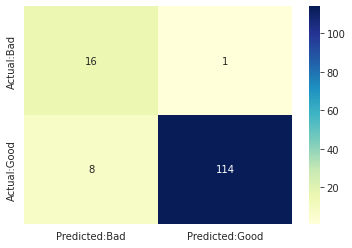

In [36]:
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<H3>Multinomial Naive Bayes

In [37]:
mnb = MultinomialNB()
mnb.fit(trainX,trainY)

MultinomialNB()

In [38]:
mnb.score(testX,testY)

0.9496402877697842

In [39]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

In [40]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

Training Accuracy : 0.983132530120482
Testing Accuracy : 0.9496402877697842


In [41]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.75      0.95      0.84        19
        Good       0.99      0.95      0.97       120

    accuracy                           0.95       139
   macro avg       0.87      0.95      0.90       139
weighted avg       0.96      0.95      0.95       139




CONFUSION MATRIX


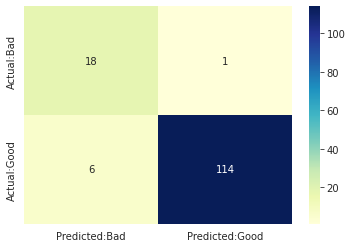

In [42]:
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<H3> S V M

In [43]:
supp = SVC()
supp.fit(trainX,trainY)

SVC()

In [44]:
supp.score(testX,testY)

0.9496402877697842

In [45]:
Scores_ml['SVC'] = np.round(supp.score(testX,testY),2)

In [46]:
print('Training Accuracy :',supp.score(trainX,trainY))
print('Testing Accuracy :',supp.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(supp.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

Training Accuracy : 0.9855421686746988
Testing Accuracy : 0.9496402877697842


In [47]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(supp.predict(testX), testY,
                            target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.83      0.87      0.85        23
        Good       0.97      0.97      0.97       116

    accuracy                           0.95       139
   macro avg       0.90      0.92      0.91       139
weighted avg       0.95      0.95      0.95       139




CONFUSION MATRIX


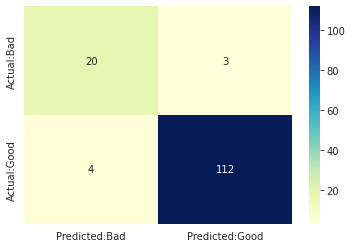

In [48]:
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<H3>Decesion Tree

In [49]:
dtc = DecisionTreeClassifier()
dtc.fit(trainX,trainY)

DecisionTreeClassifier()

In [50]:
dtc.score(testX,testY)

0.935251798561151

In [51]:
Scores_ml['C.45'] = np.round(dtc.score(testX,testY),2)

In [52]:
print('Training Accuracy :',dtc.score(trainX,trainY))
print('Testing Accuracy :',dtc.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(dtc.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

Training Accuracy : 1.0
Testing Accuracy : 0.935251798561151


In [53]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(dtc.predict(testX), testY,
                            target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.75      0.86      0.80        21
        Good       0.97      0.95      0.96       118

    accuracy                           0.94       139
   macro avg       0.86      0.90      0.88       139
weighted avg       0.94      0.94      0.94       139




CONFUSION MATRIX


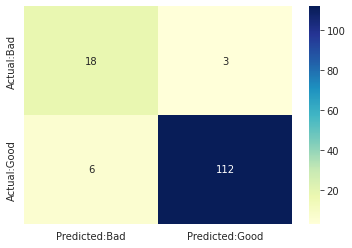

In [54]:
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<H3> Neural Network

In [55]:
nn = MLPClassifier()
nn.fit(trainX,trainY)

MLPClassifier()

In [56]:
nn.score(testX,testY)

0.9424460431654677

In [57]:
Scores_ml['Neural Network'] = np.round(nn.score(testX,testY),2)

In [58]:
print('Training Accuracy :',nn.score(trainX,trainY))
print('Testing Accuracy :',nn.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(nn.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

Training Accuracy : 1.0
Testing Accuracy : 0.9424460431654677


In [59]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(dtc.predict(testX), testY,
                            target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.75      0.86      0.80        21
        Good       0.97      0.95      0.96       118

    accuracy                           0.94       139
   macro avg       0.86      0.90      0.88       139
weighted avg       0.94      0.94      0.94       139




CONFUSION MATRIX


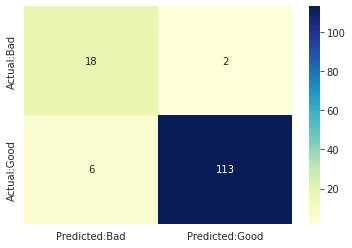

In [60]:
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<H3> K-Nearst Neighbor

In [61]:
knn = KNeighborsClassifier()
knn.fit(trainX,trainY)

KNeighborsClassifier()

In [62]:
knn.score(testX,testY)

0.8848920863309353

In [63]:
Scores_ml['KNN'] = np.round(knn.score(testX,testY),2)

In [64]:
print('Training Accuracy :',knn.score(trainX,trainY))
print('Testing Accuracy :',knn.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(knn.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

Training Accuracy : 0.9060240963855422
Testing Accuracy : 0.8848920863309353


In [65]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(dtc.predict(testX), testY,
                            target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.75      0.86      0.80        21
        Good       0.97      0.95      0.96       118

    accuracy                           0.94       139
   macro avg       0.86      0.90      0.88       139
weighted avg       0.94      0.94      0.94       139




CONFUSION MATRIX


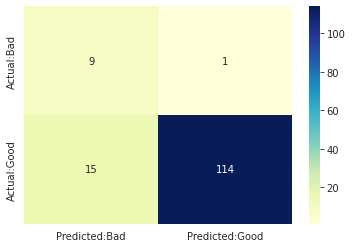

In [66]:
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

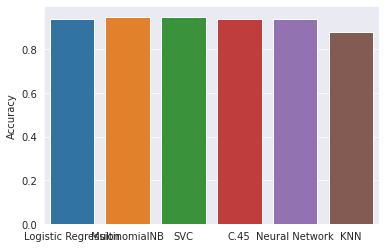

In [67]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

In [98]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), MLPClassifier())

In [99]:
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)

In [100]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)),
                ('mlpclassifier', MLPClassifier())])

In [101]:
pipeline_ls.score(testX,testY) 

0.9568345323741008

In [102]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

Training Accuracy : 1.0
Testing Accuracy : 0.9568345323741008


In [103]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.68      1.00      0.81        13
        Good       1.00      0.95      0.98       126

    accuracy                           0.96       139
   macro avg       0.84      0.98      0.89       139
weighted avg       0.97      0.96      0.96       139




CONFUSION MATRIX


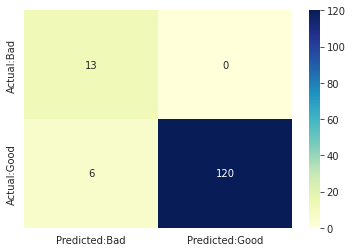

In [104]:
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [105]:
pickle.dump(pipeline_ls,open('web_phishing.pkl','wb'))

In [106]:
loaded_model = pickle.load(open('web_phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9568345323741008


In [107]:
predict_bad = ['http://www.paypal.com.it.webscr.logq.gtw.pl/?cmd=_run-check-cookie-submit&redirectCmd=_login-submit','facebook-support-tech.com','facebook.activation.inactive-scure.com','instagram-verify-support.com']
predict_good = ['https://instagram.com','https://facebook.com','tokopedia.com','www.paypal.com']
loaded_model = pickle.load(open('web_phishing.pkl', 'rb'))

result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
